In [1]:
%matplotlib inline

from discrete_shocklets import shocklets, kernel_functions
import matplotlib.pyplot as plt
import numpy as np

In [54]:
np.random.seed(50)
# random walk method
noise = np.random.choice([-1, 1], size=5000, replace=True)
x = np.cumsum(noise)

print(type(x))
print(x.shape)
# plt.plot(x, 'darkgray')
# plt.xlabel('$n$')
# plt.ylabel('$x_n$')
# plt.xlim(0, 5000 - 1)
# plt.show()

# print(x.shape)
# print(x[:10])

<class 'numpy.ndarray'>
(5000,)


windows: [  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480  490  500  510  520  530  540  550  560
  570  580  590  600  610  620  630  640  650  660  670  680  690  700
  710  720  730  740  750  760  770  780  790  800  810  820  830  840
  850  860  870  880  890  900  910  920  930  940  950  960  970  980
  990 1000]


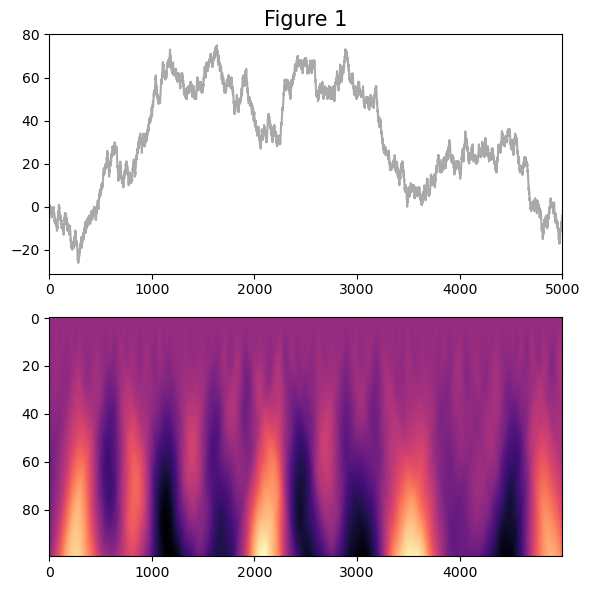

In [ ]:
# windows = np.linspace(10, 1000, 100)  # 100 windows, equally spaced from width 10 to 1000
windows = np.linspace(10, 1000, 100).astype(int)
kernel = kernel_functions.power_cusp  # a symmetric power-law type cusp
k_args = [3.]  # arguments for the kernel; in this case, it's the parameter $\theta = 3$.
reflection = 2  # reflect the kernel over the horizontal axis

print(f'windows: {windows}')


shocklets_obj = shocklets.cusplet(
    x,
    windows,
    kernel_func=kernel,
    kernel_args=k_args,
    reflection=reflection
)

dst,  largest_kernel = shocklets_obj

# fitting two plots side by side
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
ax0, ax1 = axes
ax0.plot(x, 'darkgray')
ax0.set_xlim(0, len(x))

im = ax1.imshow(
    dst,
    aspect='auto',
    cmap=plt.cm.magma,
)

ax0.set_title('Figure 1', fontsize=15);
plt.tight_layout()
plt.show()

In [ ]:

# Pass the kernel function `kernel` instead of `largest_kernel`
result = shocklets.inverse_cusplet(
    cc=dst,  # The cusplet coefficients
    kernel=kernel,  # The kernel function
    widths=windows,  # The window sizes
    k_args=k_args,  # The kernel arguments
    reflection=2  # The reflection parameter
)

print(result)

(array([ 4.        , -3.81816689, -2.10172516, ..., -3.99221966,
       -6.10172516, -7.81816689]), array([], dtype=float64), 5000, array([5.23973627e+00, 5.23973627e+00, 5.23970895e+00, ...,
       8.33000863e-05, 3.70012925e-05, 9.25580252e-06]))


In [49]:
print(result[0])
print(result[3])

[ 4.         -3.81816689 -2.10172516 ... -3.99221966 -6.10172516
 -7.81816689]
[5.23973627e+00 5.23973627e+00 5.23970895e+00 ... 8.33000863e-05
 3.70012925e-05 9.25580252e-06]


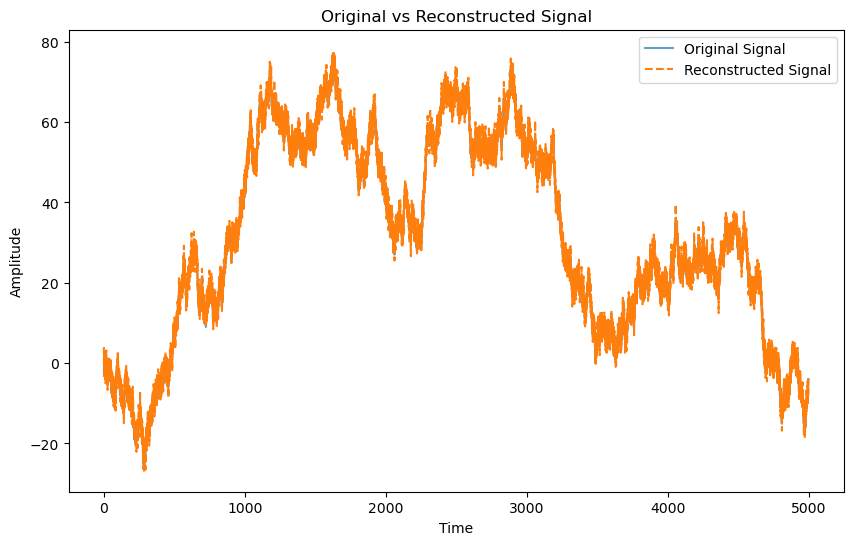

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, label="Original Signal", alpha=0.7)
plt.plot(result[0], label="Reconstructed Signal", linestyle="dashed")
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# print(x.max())
# print(x.min())
# print(result[0].max())


mae = mean_absolute_error(x, result[0])
rmse = np.sqrt(mean_squared_error(x, result[0]))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.8400042208298306
Mean Absolute Error: 32.94780366962034
Mean Absolute Error: 32.94780366962034
